## Bitcoin LSTM Model with Tweet Volume and Sentiment

In [48]:
import pandas as pd
import re 
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure

from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:

#set seed
np.random.seed(12345)

# Data Pre-processing

In [50]:
notclean = pd.read_csv('/content/drive/MyDrive/Datasets/cleanprep.csv', delimiter=',', error_bad_lines=False,engine = 'python',header = None)

In [51]:
notclean.head()

,0,1,2,3,4
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


In [52]:
notclean.shape


(1413001, 5)

In [53]:
#-----------------Pre-processing -------------------#

notclean.columns =['dt', 'name','text','polarity','sensitivity']
notclean.head()


,dt,name,text,polarity,sensitivity
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


In [54]:
notclean =notclean.drop(['name','text'], axis=1)
notclean.head()

,dt,polarity,sensitivity
0,2018-07-11 19:35:15.363270,0.007273,0.590909
1,2018-07-11 19:35:15.736769,0.000000,0.000000
2,2018-07-11 19:35:15.744769,0.625000,0.500000
3,2018-07-11 19:35:15.867339,0.000000,0.175000
4,2018-07-11 19:35:16.021448,0.333333,0.500000


In [55]:
notclean.info()
notclean['dt'] = pd.to_datetime(notclean['dt'])
notclean['DateTime'] = notclean['dt'].dt.floor('h')
notclean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   dt           1413001 non-null  object 
 1   polarity     1413001 non-null  float64
 2   sensitivity  1413001 non-null  float64
dtypes: float64(2), object(1)
memory usage: 32.3+ MB


,dt,polarity,sensitivity,DateTime
0,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
2,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
3,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
4,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [56]:
vdf = notclean.groupby(pd.Grouper(key='dt',freq='H')).size().reset_index(name='tweet_vol')
vdf.head()


,dt,tweet_vol
0,2018-07-11 19:00:00,1747
1,2018-07-11 20:00:00,4354
2,2018-07-11 21:00:00,4432
3,2018-07-11 22:00:00,3980
4,2018-07-11 23:00:00,3830


In [57]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         302 non-null    datetime64[ns]
 1   tweet_vol  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB


In [58]:
vdf.index = pd.to_datetime(vdf.index)
vdf = vdf.set_index('dt')
 

In [59]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2018-07-11 19:00:00 to 2018-07-24 08:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_vol  302 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [60]:
vdf.head()

,tweet_vol
dt,
2018-07-11 19:00:00,1747
2018-07-11 20:00:00,4354
2018-07-11 21:00:00,4432
2018-07-11 22:00:00,3980
2018-07-11 23:00:00,3830


In [61]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 43.1 MB


In [62]:
notclean.index = pd.to_datetime(notclean.index)
notclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413001 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001413
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 53.9 MB


In [63]:
vdf['tweet_vol'] =vdf['tweet_vol'].astype(float)

In [64]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2018-07-11 19:00:00 to 2018-07-24 08:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_vol  302 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [65]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413001 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001413
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   dt           1413001 non-null  datetime64[ns]
 1   polarity     1413001 non-null  float64       
 2   sensitivity  1413001 non-null  float64       
 3   DateTime     1413001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 53.9 MB


In [66]:
notclean.head()

,dt,polarity,sensitivity,DateTime
1970-01-01 00:00:00.000000000,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1970-01-01 00:00:00.000000001,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000002,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000003,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
1970-01-01 00:00:00.000000004,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [67]:
df = notclean.groupby('DateTime').agg(lambda x: x.mean())

In [68]:
df['Tweet_vol'] = vdf['tweet_vol']

In [69]:
df = df.drop(df.index[0])

In [70]:
df.head()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0


In [71]:
df.tail()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-24 04:00:00,2018-07-24 04:27:40.946246144,0.121358,0.236000,4475.0
2018-07-24 05:00:00,2018-07-24 05:28:40.424965632,0.095163,0.216924,4808.0
2018-07-24 06:00:00,2018-07-24 06:30:52.606722816,0.088992,0.220173,6036.0
2018-07-24 07:00:00,2018-07-24 07:27:29.229672704,0.091439,0.198279,6047.0
2018-07-24 08:00:00,2018-07-24 08:07:02.674451968,0.071268,0.218217,2444.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 2018-07-11 20:00:00 to 2018-07-24 08:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt           301 non-null    datetime64[ns]
 1   polarity     301 non-null    float64       
 2   sensitivity  301 non-null    float64       
 3   Tweet_vol    301 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.8 KB


In [73]:
train= pd.read_csv('/content/drive/MyDrive/Datasets/cleanprep.csv',nrows=20000)
train.shape

(20000, 5)

In [74]:
train.columns=['date','name','text','sentiment','polarity']
train=train.drop(['date','name','polarity'],axis=1)
train.head()

,text,sentiment
0,b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000
1,b'Duplicate skilled traders automatically with...,0.625000
2,b'Project Manager - Technical - FinTech - Cent...,0.000000
3,"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333
4,"b'If you don\xe2\x80\x99t understand Bitcoin, ...",0.000000


In [75]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#lets save stopwords in a variable
stop = list(stopwords.words("english"))
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [76]:
import string

# save list of punctuation/special characters in a variable
punctuation = list(string.punctuation)
print(punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [77]:
from nltk.stem import WordNetLemmatizer
# create an object to convert the words to its lemma form
lemma = WordNetLemmatizer()

In [78]:
# lets make a combine list of stopwords and punctuations
sw_pun = stop + punctuation

In [79]:
# function to preprocess the messages
def preprocess(tweet):
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet) # removing urls 
    tweet = re.sub('[^\w]',' ',tweet) # remove embedded special characters in words (for example #earthquake)         
    #tweet = re.sub('[\d]','',tweet) # this will remove numeric characters
    tweet = tweet.lower()
    words = tweet.split()  
    sentence = ""
    for word in words:     
        if word not in (sw_pun):  # removing stopwords & punctuations                
            word = lemma.lemmatize(word,pos = 'v')  # converting to lemma    
            if len(word) > 3: # we will consider words with length  greater than 3 only
                sentence = sentence + word + ' '             
    return(sentence)

In [80]:
nltk.download('wordnet')
# apply preprocessing functions on the train and test datasets
train['text'] = train['text'].apply(lambda s : preprocess(s))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
# function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [82]:
# applying the function on the train and the test datasets
train['text'] = train['text'].apply(lambda s : remove_emoji(s))

#Vocabulary Creation

In [83]:
# function to create vocab
from collections import Counter
def create_vocab(df):
    vocab = Counter()
    for i in range(df.shape[0]):
        vocab.update(df.text[i].split())
    return(vocab)

In [84]:
# concatenate training and testing datasets
master=train.reset_index(drop=True)

# call vocabulary creation function on master dataset
vocab = create_vocab(master)

# lets check the no. of words in the vocabulary
len(vocab)

19951

In [85]:
# lets check the most common 50 words in the vocabulary
vocab.most_common(50)

[('bitcoin', 10895),
 ('crypto', 3131),
 ('price', 2043),
 ('blockchain', 1707),
 ('cryptocurrency', 1464),
 ('ethereum', 1277),
 ('exchange', 899),
 ('copy', 842),
 ('traders', 728),
 ('automatically', 686),
 ('wangzai888', 682),
 ('trade', 678),
 ('market', 582),
 ('2018', 577),
 ('airdrop', 531),
 ('money', 515),
 ('x99s', 507),
 ('cash', 485),
 ('news', 469),
 ('nbtc', 450),
 ('project', 434),
 ('sell', 430),
 ('ripple', 426),
 ('free', 424),
 ('current', 420),
 ('make', 417),
 ('litecoin', 413),
 ('binance', 393),
 ('leverage', 368),
 ('bitmex', 368),
 ('coin', 359),
 ('india', 338),
 ('know', 337),
 ('time', 335),
 ('100x', 328),
 ('neth', 325),
 ('look', 323),
 ('live', 318),
 ('best', 314),
 ('mine', 314),
 ('covesting', 313),
 ('hackney', 306),
 ('blackpool', 305),
 ('kent', 305),
 ('solihul', 305),
 ('southall', 305),
 ('scotland', 305),
 ('nottinghill', 305),
 ('delhi', 305),
 ('britainfirst', 305)]

In [86]:
# create the final vocab by considering words with more than one occurence
final_vocab = []
min_occur = 2
for k,v in vocab.items():
    if v >= min_occur:
        final_vocab.append(k)

In [87]:
# lets check the no. of the words in the final vocabulary
vocab_size = len(final_vocab)
vocab_size

7854

In [88]:
# function to filter the dataset, keep only words which are present in the vocab
def filter(tweet):
    sentence = ""
    for word in tweet.split():  
        if word in final_vocab:
            sentence = sentence + word + ' '
    return(sentence)

In [89]:
# apply filter function on the train and test datasets
train['text'] = train['text'].apply(lambda s : filter(s))
train.sample(10)

,text,sentiment
2923,money historical approach bitcoin money japan,0.000000
19309,iran could become first country force bitcoin ...,-0.025000
3721,latest episode live cboe bitcoin decision date...,0.335227
10774,bitcoin bitcoincash transaction bitcoin bitcoi...,0.000000
2031,criptodolar crypto trade 2018 dash,0.000000
10895,xa5711 mini lisk,0.000000
3576,well,0.000000
14079,,0.000000
14488,btcp btcp fork trade invest privacy,0.000000
7058,mb8coin read understand project believe mb8coi...,0.750000


In [47]:
btcDF = pd.read_csv('/content/drive/MyDrive/Datasets/btcSave2.csv', error_bad_lines=False,engine = 'python')

In [90]:
btcDF['Timestamp'] = pd.to_datetime(btcDF['Timestamp'])
btcDF = btcDF.set_index(pd.DatetimeIndex(btcDF['Timestamp']))

In [91]:
btcDF.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,,
2018-07-10 01:00:00,2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [92]:
btcDF = btcDF.drop(['Timestamp'], axis=1)

In [93]:
btcDF.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [94]:
Final_df = pd.merge(df,btcDF, how='inner',left_index=True, right_index=True)

In [95]:
Final_df.head()

,dt,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37,6315.33
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55,6359.53
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87,6354.12
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69,6368.23
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22,6371.51


In [96]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dt                 294 non-null    datetime64[ns]
 1   polarity           294 non-null    float64       
 2   sensitivity        294 non-null    float64       
 3   Tweet_vol          294 non-null    float64       
 4   Open               294 non-null    float64       
 5   High               294 non-null    float64       
 6   Low                294 non-null    float64       
 7   Close              294 non-null    float64       
 8   Volume (BTC)       294 non-null    float64       
 9   Volume (Currency)  294 non-null    float64       
 10  Weighted Price     294 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 27.6 KB


In [97]:
Final_df=Final_df.drop(['Weighted Price'],axis=1 )


In [98]:
Final_df.head()

,dt,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency)
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22


In [99]:
Final_df.columns = ['','Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Close_Price', 'Volume_BTC', 'Volume_Dollar']

In [100]:
Final_df.head()

,,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Close_Price,Volume_BTC,Volume_Dollar
2018-07-11 20:00:00,2018-07-11 20:27:49.510634240,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,6350.00,986.73,6231532.37
2018-07-11 21:00:00,2018-07-11 21:28:35.636373760,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,6356.48,126.46,804221.55
2018-07-11 22:00:00,2018-07-11 22:27:44.646708224,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,6361.93,259.10,1646353.87
2018-07-11 23:00:00,2018-07-11 23:28:06.455845632,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,6368.78,81.54,519278.69
2018-07-12 00:00:00,2018-07-12 00:28:47.975380992,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,6380.00,124.55,793560.22


In [101]:
Final_df = Final_df[['Polarity', 'Sensitivity','Tweet_vol', 'Open','High','Low', 'Volume_BTC', 'Volume_Dollar', 'Close_Price']]

In [102]:
Final_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00
...,...,...,...,...,...,...,...,...,...
2018-07-23 21:00:00,0.107282,0.235636,5164.0,7746.99,7763.59,7690.16,237.63,1836633.86,7706.00
2018-07-23 22:00:00,0.094493,0.271796,4646.0,7699.13,7759.99,7690.50,63.31,489000.25,7750.09
2018-07-23 23:00:00,0.074246,0.231640,4455.0,7754.57,7777.00,7715.45,280.46,2173424.81,7722.32
2018-07-24 00:00:00,0.080870,0.219367,3862.0,7722.95,7730.61,7690.17,496.48,3830571.66,7719.62


In [103]:
#---------------Stage 1 Complete ------------------#
#Final_df.to_csv('Desktop/Sentiment.csv')

# Exploratory Analysis

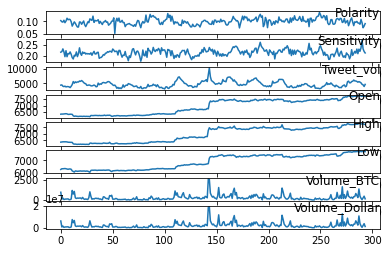

In [104]:
#--------------Analysis----------------------------#

values = Final_df.values
groups = [0,1,2,3,4,5,6,7]
i =1  
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(Final_df.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [105]:
Final_df['Volume_BTC'].max()


2640.49

In [106]:
Final_df['Volume_Dollar'].max()

19126407.89

In [107]:
Final_df['Volume_BTC'].sum()

96945.04000000001

In [108]:
Final_df['Volume_Dollar'].sum()

684457140.05

In [109]:
Final_df['Tweet_vol'].max()

10452.0

In [110]:
Final_df.describe()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02,294.000000
mean,0.099534,0.214141,4691.119048,6915.349388,6946.782925,6889.661054,329.745034,2.328086e+06,6920.150000
std,0.012114,0.014940,1048.922706,564.467674,573.078843,559.037540,344.527625,2.508128e+06,565.424866
min,0.051695,0.174330,2998.000000,6149.110000,6173.610000,6072.000000,22.000000,1.379601e+05,6149.110000
25%,0.091489,0.203450,3878.750000,6285.077500,6334.942500,6266.522500,129.230000,8.412214e+05,6283.497500
50%,0.099198,0.214756,4452.000000,7276.845000,7311.380000,7245.580000,223.870000,1.607008e+06,7281.975000
75%,0.106649,0.223910,5429.750000,7422.957500,7457.202500,7396.427500,385.135000,2.662185e+06,7424.560000
max,0.135088,0.271796,10452.000000,7754.570000,7800.000000,7724.500000,2640.490000,1.912641e+07,7750.090000


In [111]:
cor = Final_df.corr()
cor

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
Polarity,1.000000,0.380350,-0.167573,0.179056,0.176277,0.180088,-0.062868,-0.052646,0.178456
Sensitivity,0.380350,1.000000,0.053903,0.194763,0.200611,0.190222,0.097124,0.112425,0.193203
Tweet_vol,-0.167573,0.053903,1.000000,0.237185,0.262207,0.234330,0.541112,0.545850,0.250448
Open,0.179056,0.194763,0.237185,1.000000,0.997128,0.998799,0.217478,0.277600,0.997217
High,0.176277,0.200611,0.262207,0.997128,1.000000,0.996650,0.270551,0.329816,0.998816
Low,0.180088,0.190222,0.234330,0.998799,0.996650,1.000000,0.202895,0.263863,0.998058
Volume_BTC,-0.062868,0.097124,0.541112,0.217478,0.270551,0.202895,1.000000,0.995873,0.243875
Volume_Dollar,-0.052646,0.112425,0.545850,0.277600,0.329816,0.263863,0.995873,1.000000,0.303347
Close_Price,0.178456,0.193203,0.250448,0.997217,0.998816,0.998058,0.243875,0.303347,1.000000


In [112]:
Top_Vol =Final_df['Volume_BTC'].nlargest(10)
Top_Vol

2018-07-17 18:00:00    2640.49
2018-07-17 19:00:00    2600.32
2018-07-23 03:00:00    1669.28
2018-07-18 04:00:00    1576.15
2018-07-20 17:00:00    1510.00
2018-07-18 19:00:00    1490.02
2018-07-23 19:00:00    1396.32
2018-07-12 07:00:00    1211.64
2018-07-16 10:00:00    1147.69
2018-07-23 08:00:00    1135.38
Name: Volume_BTC, dtype: float64

In [113]:
Top_Sen =Final_df['Sensitivity'].nlargest(10)
Top_Sen

2018-07-23 22:00:00    0.271796
2018-07-19 20:00:00    0.262048
2018-07-21 19:00:00    0.256952
2018-07-20 22:00:00    0.246046
2018-07-22 06:00:00    0.245820
2018-07-19 19:00:00    0.244655
2018-07-19 21:00:00    0.244215
2018-07-18 20:00:00    0.243534
2018-07-18 21:00:00    0.243422
2018-07-18 18:00:00    0.241287
Name: Sensitivity, dtype: float64

In [114]:
Top_Pol =Final_df['Polarity'].nlargest(10)
Top_Pol

2018-07-22 05:00:00    0.135088
2018-07-16 03:00:00    0.130634
2018-07-19 20:00:00    0.127696
2018-07-15 10:00:00    0.127469
2018-07-22 06:00:00    0.126299
2018-07-15 06:00:00    0.124505
2018-07-16 05:00:00    0.124210
2018-07-22 09:00:00    0.122784
2018-07-15 13:00:00    0.122411
2018-07-22 12:00:00    0.122021
Name: Polarity, dtype: float64

In [115]:
Top_Tweet =Final_df['Tweet_vol'].nlargest(10)
Top_Tweet

2018-07-17 19:00:00    10452.0
2018-07-17 18:00:00     7995.0
2018-07-17 20:00:00     7354.0
2018-07-16 14:00:00     7280.0
2018-07-18 15:00:00     7222.0
2018-07-18 14:00:00     7209.0
2018-07-18 13:00:00     7171.0
2018-07-16 13:00:00     7133.0
2018-07-19 16:00:00     6886.0
2018-07-18 12:00:00     6844.0
Name: Tweet_vol, dtype: float64

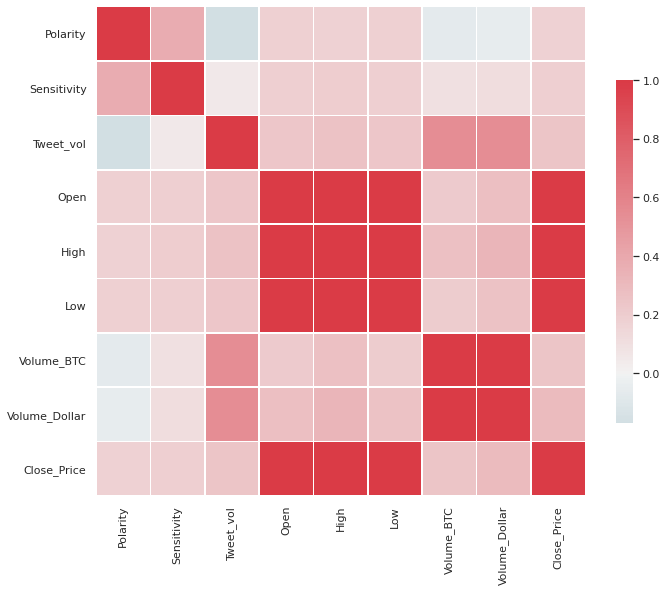

In [116]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

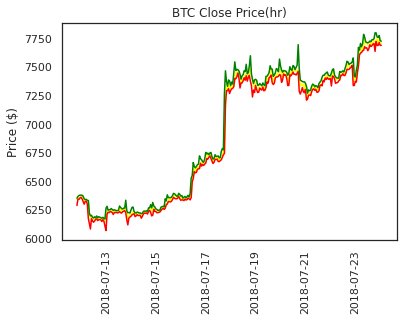

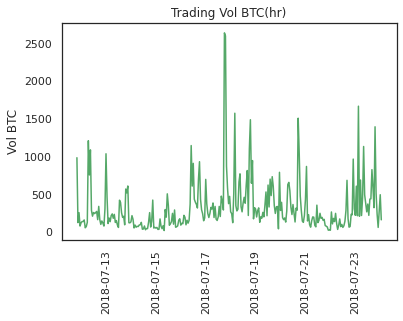

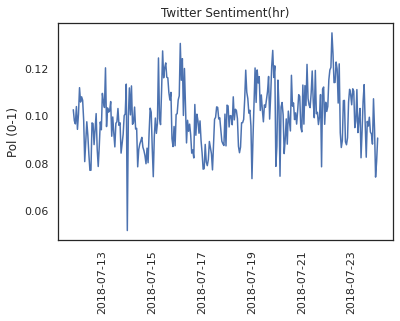

No handles with labels found to put in legend.


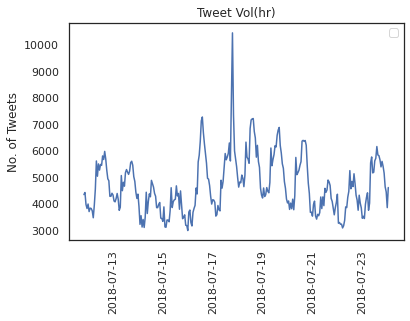

No handles with labels found to put in legend.


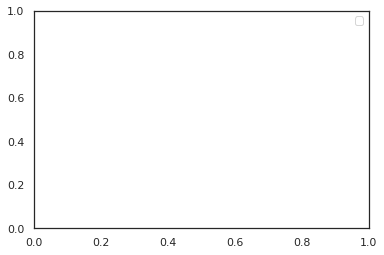

In [117]:
plt.plot(Final_df.index, Final_df['Open'], 'yellow')
plt.plot(Final_df.index, Final_df['Low'], 'red')
plt.plot(Final_df.index, Final_df['High'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

plt.plot(Final_df.index, Final_df['Volume_BTC'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(Final_df.index, Final_df['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();
plt.legend()

plt.plot(Final_df.index, Final_df['Tweet_vol'], 'b')
plt.xticks(rotation='vertical')
plt.title('Tweet Vol(hr)')
plt.ylabel('No. of Tweets');
plt.show();
plt.legend()


In [118]:
#sns Heatmap for Hour x volume 
#Final_df['time']=Final_df.index.time()
Final_df['time']=Final_df.index.to_series().apply(lambda x: x.strftime("%X"))

In [119]:
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,6342.97,6354.19,6291.00,986.73,6231532.37,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,6352.99,6370.00,6345.76,126.46,804221.55,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,6350.85,6378.47,6345.00,259.10,1646353.87,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,6362.36,6381.25,6356.74,81.54,519278.69,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,6369.49,6381.25,6361.83,124.55,793560.22,6380.00,00:00:00


In [120]:
hour_df=Final_df

In [121]:
hour_df=hour_df.groupby('time').agg(lambda x: x.mean())
hour_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
time,,,,,,,,,
00:00:00,0.090298,0.211771,3976.384615,6930.237692,6958.360769,6900.588462,322.836154,2.228120e+06,6935.983077
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,6890.985000
05:00:00,0.108032,0.215058,3904.166667,6891.468333,6911.175833,6869.017500,213.315000,1.524601e+06,6890.451667
06:00:00,0.104412,0.210424,3760.250000,6889.327500,6907.070833,6868.484167,183.329167,1.281427e+06,6891.371667
07:00:00,0.100942,0.209435,4056.000000,6891.645833,6908.654167,6858.290833,329.882500,2.263694e+06,6878.757500
08:00:00,0.099380,0.210113,5095.583333,6878.635833,6903.660833,6851.435833,368.109167,2.616314e+06,6885.867500


In [122]:
hour_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
time,,,,,,,,,
00:00:00,0.090298,0.211771,3976.384615,6930.237692,6958.360769,6900.588462,322.836154,2.228120e+06,6935.983077
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,6890.985000


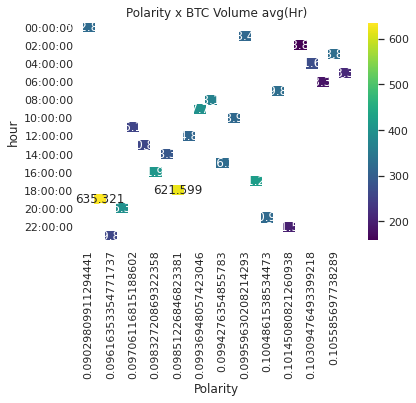

In [123]:
#sns Hourly Heatmap
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='hour', columns='Polarity', values='Volume_BTC')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('Polarity x BTC Volume avg(Hr)')
plt.show()

#sns daily heatmap?

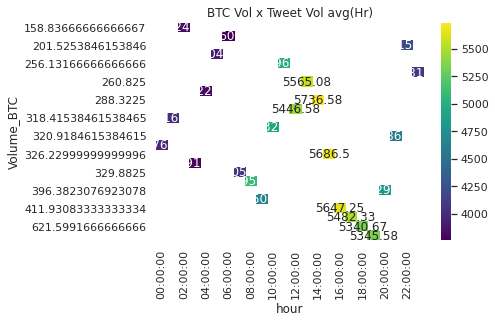

In [124]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='Volume_BTC', columns='hour', values='Tweet_vol')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('BTC Vol x Tweet Vol avg(Hr)')
plt.show()

In [125]:
cor = Final_df.corr()
cor


#----------------End Analysis------------------------#

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,Close_Price
Polarity,1.000000,0.380350,-0.167573,0.179056,0.176277,0.180088,-0.062868,-0.052646,0.178456
Sensitivity,0.380350,1.000000,0.053903,0.194763,0.200611,0.190222,0.097124,0.112425,0.193203
Tweet_vol,-0.167573,0.053903,1.000000,0.237185,0.262207,0.234330,0.541112,0.545850,0.250448
Open,0.179056,0.194763,0.237185,1.000000,0.997128,0.998799,0.217478,0.277600,0.997217
High,0.176277,0.200611,0.262207,0.997128,1.000000,0.996650,0.270551,0.329816,0.998816
Low,0.180088,0.190222,0.234330,0.998799,0.996650,1.000000,0.202895,0.263863,0.998058
Volume_BTC,-0.062868,0.097124,0.541112,0.217478,0.270551,0.202895,1.000000,0.995873,0.243875
Volume_Dollar,-0.052646,0.112425,0.545850,0.277600,0.329816,0.263863,0.995873,1.000000,0.303347
Close_Price,0.178456,0.193203,0.250448,0.997217,0.998816,0.998058,0.243875,0.303347,1.000000


**LSTM** **Preparation**

In [126]:
df = Final_df

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       294 non-null    float64
 1   Sensitivity    294 non-null    float64
 2   Tweet_vol      294 non-null    float64
 3   Open           294 non-null    float64
 4   High           294 non-null    float64
 5   Low            294 non-null    float64
 6   Volume_BTC     294 non-null    float64
 7   Volume_Dollar  294 non-null    float64
 8   Close_Price    294 non-null    float64
 9   time           294 non-null    object 
dtypes: float64(9), object(1)
memory usage: 25.3+ KB


In [128]:
df = df.drop(['Open','High', 'Low', 'Volume_Dollar'], axis=1)
df.head()

,Polarity,Sensitivity,Tweet_vol,Volume_BTC,Close_Price,time
2018-07-11 20:00:00,0.102657,0.216148,4354.0,986.73,6350.00,20:00:00
2018-07-11 21:00:00,0.098004,0.218612,4432.0,126.46,6356.48,21:00:00
2018-07-11 22:00:00,0.096688,0.231342,3980.0,259.10,6361.93,22:00:00
2018-07-11 23:00:00,0.103997,0.217739,3830.0,81.54,6368.78,23:00:00
2018-07-12 00:00:00,0.094383,0.195256,3998.0,124.55,6380.00,00:00:00


In [129]:
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


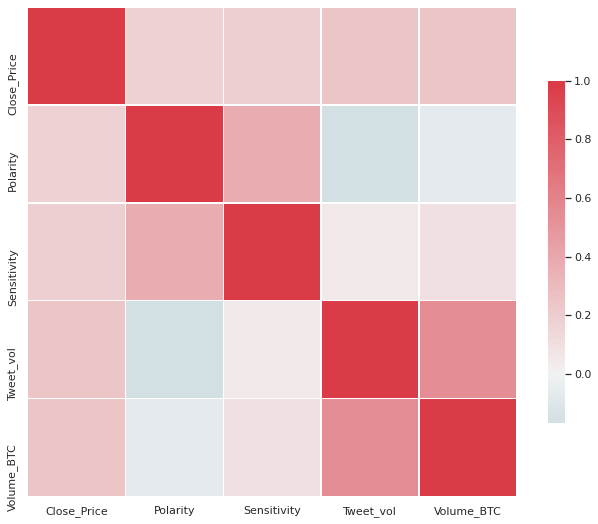

In [130]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

# LSTM Model

In [131]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [132]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC
2018-07-11 20:00:00,6350.00,0.102657,0.216148,4354.0,986.73
2018-07-11 21:00:00,6356.48,0.098004,0.218612,4432.0,126.46
2018-07-11 22:00:00,6361.93,0.096688,0.231342,3980.0,259.10
2018-07-11 23:00:00,6368.78,0.103997,0.217739,3830.0,81.54
2018-07-12 00:00:00,6380.00,0.094383,0.195256,3998.0,124.55


In [133]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)
n_hours = 3 #adding 3 hours lags creating number of observations 
n_features = 5 #Features in the dataset.
n_obs = n_hours*n_features

In [134]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738
4,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607


In [135]:
reframed.drop(reframed.columns[-4], axis=1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.125479,0.611105,0.429055,0.181916,0.368430,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738
4,0.129527,0.555312,0.454335,0.192380,0.039893,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164
5,0.132931,0.539534,0.584943,0.131741,0.090548,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637
6,0.137210,0.627175,0.445375,0.111618,0.022738,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561
7,0.144218,0.511893,0.214693,0.134156,0.039164,0.135117,0.589271,0.500135,0.095922,0.045637,0.111700,0.722717,0.212514,0.113362,0.045561,0.111101,0.649855,0.365349,0.111752,0.053607


In [136]:
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  ...   var3(t)   var4(t)   var5(t)
3   0.125479   0.611105   0.429055  ...  0.445375  0.111618  0.022738
4   0.129527   0.555312   0.454335  ...  0.214693  0.134156  0.039164
5   0.132931   0.539534   0.584943  ...  0.500135  0.095922  0.045637
6   0.137210   0.627175   0.445375  ...  0.212514  0.113362  0.045561
7   0.144218   0.511893   0.214693  ...  0.365349  0.111752  0.053607

[5 rows x 20 columns]


In [137]:
values = reframed.values
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(200, 20)

In [138]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [139]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 3, 5) (200,) (91, 3, 5) (91,)


In [140]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=6, validation_data=(test_X, test_y), verbose=2, shuffle=False,validation_split=0.2)
# plot history

Epoch 1/50
27/27 - 3s - loss: 0.2008 - val_loss: 0.7978
Epoch 2/50
27/27 - 0s - loss: 0.1888 - val_loss: 0.7557
Epoch 3/50
27/27 - 0s - loss: 0.1863 - val_loss: 0.7306
Epoch 4/50
27/27 - 0s - loss: 0.1835 - val_loss: 0.7128
Epoch 5/50
27/27 - 0s - loss: 0.1803 - val_loss: 0.6980
Epoch 6/50
27/27 - 0s - loss: 0.1770 - val_loss: 0.6849
Epoch 7/50
27/27 - 0s - loss: 0.1735 - val_loss: 0.6722
Epoch 8/50
27/27 - 0s - loss: 0.1697 - val_loss: 0.6582
Epoch 9/50
27/27 - 0s - loss: 0.1661 - val_loss: 0.6437
Epoch 10/50
27/27 - 0s - loss: 0.1627 - val_loss: 0.6303
Epoch 11/50
27/27 - 0s - loss: 0.1590 - val_loss: 0.6164
Epoch 12/50
27/27 - 0s - loss: 0.1549 - val_loss: 0.5998
Epoch 13/50
27/27 - 0s - loss: 0.1505 - val_loss: 0.5820
Epoch 14/50
27/27 - 0s - loss: 0.1465 - val_loss: 0.5643
Epoch 15/50
27/27 - 0s - loss: 0.1417 - val_loss: 0.5436
Epoch 16/50
27/27 - 0s - loss: 0.1370 - val_loss: 0.5230
Epoch 17/50
27/27 - 0s - loss: 0.1309 - val_loss: 0.4976
Epoch 18/50
27/27 - 0s - loss: 0.1253 - 

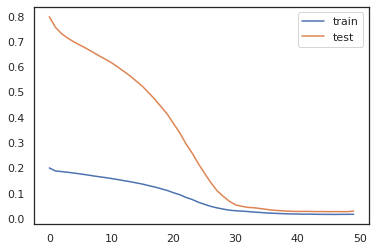

In [141]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [142]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test MSE: 8925.056
Test RMSE: 94.473


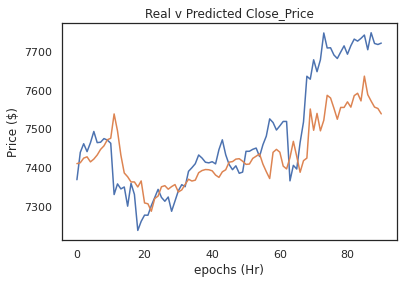

In [143]:
plt.title('Real v Predicted Close_Price')
plt.ylabel('Price ($)')
plt.xlabel('epochs (Hr)')
plt.plot(inv_y, label='Real')
plt.plot(inv_yhat, label='Predicted')
plt.show()

#**Quantization**

In [144]:
import torch
import torch.quantization
import torch.nn as nn
import copy
import os
import time

class lstm_for_demonstration(nn.Module):
  
  def __init__(self,in_dim,out_dim,depth):
     super(lstm_for_demonstration,self).__init__()
     self.lstm = nn.LSTM(in_dim,out_dim,depth)

  def forward(self,inputs,hidden):
     out,hidden = self.lstm(inputs,hidden)
     return out, hidden


In [147]:
torch.manual_seed(12345)  # set the seed for reproducibility


#shape parameters
model_dimension=3
sequence_length=5
batch_size=model_dimension * sequence_length
lstm_depth=1

# random data for input
inputs = torch.randn(sequence_length,batch_size,model_dimension)
# hidden is actually is a tuple of the initial hidden state and the initial cell state
hidden = (torch.randn(lstm_depth,batch_size,model_dimension), torch.randn(lstm_depth,batch_size,model_dimension))

In [148]:
 # here is our floating point instance
float_lstm = lstm_for_demonstration(model_dimension, model_dimension,lstm_depth)

# this is the call that does the work
quantized_lstm = torch.quantization.quantize_dynamic(
    float_lstm, {nn.LSTM, nn.Linear}, dtype=torch.qint8
)

# show the changes that were made
print('Here is the floating point version of this module:')
print(float_lstm)
print('')
print('and now the quantized version:')
print(quantized_lstm)

Here is the floating point version of this module:
lstm_for_demonstration(
  (lstm): LSTM(3, 3)
)

and now the quantized version:
lstm_for_demonstration(
  (lstm): DynamicQuantizedLSTM(3, 3)
)


In [149]:
def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size=os.path.getsize("temp.p")
    print("model: ",label,' \t','Size (KB):', size/1e3)
    os.remove('temp.p')
    return size

# compare the sizes
f=print_size_of_model(float_lstm,"fp32")
q=print_size_of_model(quantized_lstm,"int8")
print("{0:.2f} times smaller".format(f/q))

model:  fp32  	 Size (KB): 2.003
model:  int8  	 Size (KB): 2.195
0.91 times smaller


In [150]:
# compare the performance
print("Floating point FP32")
%timeit float_lstm.forward(inputs, hidden)

print("Quantized INT8")
%timeit quantized_lstm.forward(inputs,hidden)

Floating point FP32
The slowest run took 161.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 382 µs per loop
Quantized INT8
The slowest run took 44.76 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 511 µs per loop


In [151]:
# run the float model
out1, hidden1 = float_lstm(inputs, hidden)
mag1 = torch.mean(abs(out1)).item()
print('mean absolute value of output tensor values in the FP32 model is {0:.5f} '.format(mag1))

# run the quantized model
out2, hidden2 = quantized_lstm(inputs, hidden)
mag2 = torch.mean(abs(out2)).item()
print('mean absolute value of output tensor values in the INT8 model is {0:.5f}'.format(mag2))

# compare them
mag3 = torch.mean(abs(out1-out2)).item()
print('mean absolute value of the difference between the output tensors is {0:.5f} or {1:.2f} percent'.format(mag3,mag3/mag1*100))

mean absolute value of output tensor values in the FP32 model is 0.23250 
mean absolute value of output tensor values in the INT8 model is 0.23267
mean absolute value of the difference between the output tensors is 0.00130 or 0.56 percent
